This is the start of model development of a CO$_2$ electrolyzer (CO$_2$E) using a bipolar membrane.

I will do this using the Butler-Volmer form:

$$i = i_\circ\left[\exp\left(\frac{\beta_{\rm fwd} F\eta}{RT}\right) - \exp\left(-\frac{\beta_{\rm rev} F\eta}{RT}\right)\right]$$

I will model this for a CO$_2$ full-cell reaction:

$${\rm CO_2 \leftrightharpoons CO + \frac{1}{2}O_2}$$ 

at 25$^\circ$C with humidified CO$_2$ (i.e. $X_{H_2O} = 0.03$) and 1M KOH solution in the cathode.

The main reactions are as follows:

- The anode: $${\rm 2OH^+ \leftrightharpoons \frac{1}{2}O_2 + H_2O + 2e^-}$$ 
- The cathode: $${\rm CO_2 + 2H^+ + 2e^- \leftrightharpoons CO + H_2O}$$
- The bipolar membrane junction: $${\rm 2H_2O \leftrightharpoons 2H^+ + 2OH^-}$$

The bipolar membrane is composed of half cation-exchange membrane (CEM) and half anion-exchange membrane (AEM) with a junction connecting the two. It is at this junction where water gets split into respective cation and anion as shown in the figure below.

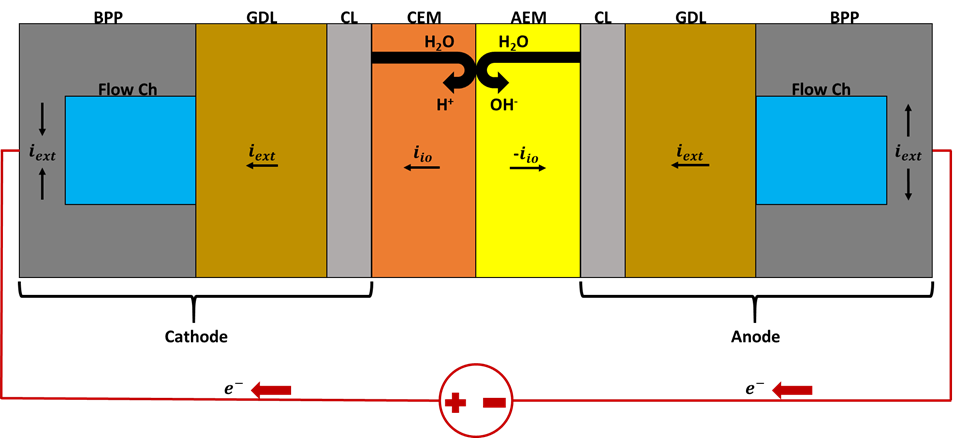

We begin with conservation of charge at the electrolyte/electrode double layers.  Calling 'el' the electrode phase:
\begin{equation}
    \frac{\partial Q_{\rm el}}{\partial t} = 0 = \pm i_{\rm ext} -i _{\rm Far} - i_{\rm dl}
\end{equation}

which leads eventually to:

\begin{equation}
    i_{\rm dl} = \pm i_{\rm ext} -i _{\rm Far}
\end{equation}
where the sign on $i_{\rm ext}$ depends on whether we deal with the cathode or the anode.  Here, consider positive current as the current, which delivers positive charge to the anode ($i_{\rm ext}$), and negative charge to the cathode ($-i_{\rm ext}$). $i_{\rm dl}$ and $i_{\rm Far}$ both move positive charge from the electrode to the electrolyte bulk interior.

### Double layer potential:

The charge separation at the double layer (C/m$^2$) then evolves as:

\begin{equation}
    \frac{\partial q_{\rm dl}}{\partial t} = i_{\rm dl}
\end{equation}
Defining the charge separation as $q_{\rm dl} = q_{\rm el} - q_{\rm elyte}$ and $\Delta \phi_{\rm dl} = \phi_{\rm el} - \phi_{\rm elyte}$: 

\begin{equation}
    \frac{d\Delta\phi_{\rm dl}}{dt} =\frac{d\left(\phi_{\rm el} - \phi_{\rm elyte}\right)}{dt} = \frac{i_{\rm dl}}{C_{\rm dl}} = \frac{1}{C_{\rm dl}}\left(\pm i_{\rm ext}-i_{\rm Far}\right)
\end{equation}

A close up view of the catalyst of the anode and cathode is shown below to illustrate the current convention.

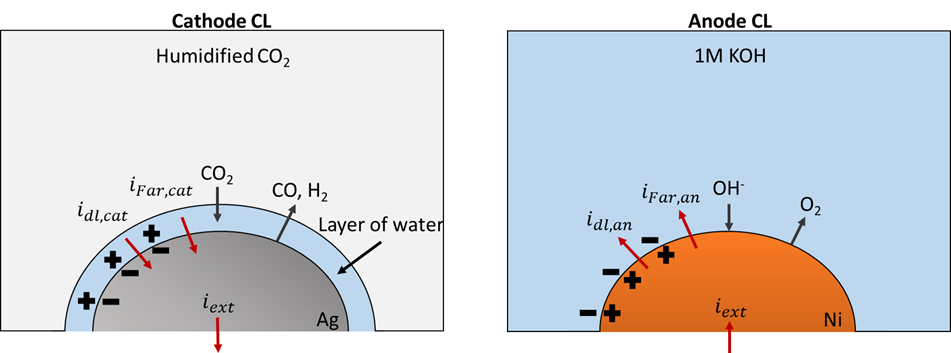

I will model this using the simplest possible model: assuming fixed gas phase composition and zero transport limitations (i.e. 'flooded cell'). In this stage of model development, I will ignore the undesired hydrogen evolution reaction on the cathode. Also, the bipolar membrane junction, i.e. CEM|AEM interface, will have a junction potential equal to water splitting, which is assumed to remain constant for now at 0.828 V.

At this stage of model development, the state variables are the electric potentials:

- The anode potential, $\phi_{\rm an}$,
- The cathode potential, $\phi_{\rm ca}$,
- The bipolar membrane junction potential, $\phi_{\rm j}$,
- The electrolyte potential on the cathode, $\phi_{\rm elyte,ca}$, and
- The electrolyte potential on the anode, $\phi_{\rm elyte,an}$.

All $\phi$ values are relative so the most negative potential, $\phi_{\rm ca}$, is chosen to be zero.  All potentials are now relative to $\phi_{\rm ca}$. The junction potential is fixed for now and a flooded cell is assumed so that the anode electrolyte potential is simply the cathode electrolyte potential plus the junction potential. The solution vector might be written as:

$$ SV=\begin{bmatrix} \phi_{\rm an} \\ \phi_{\rm elyte,an} \\ \phi_{\rm elyte,ca}\end{bmatrix}$$

From our conservation of charge, the variables we will calculate are the two double-layer voltages, $\Delta\phi_{\rm dl,an}$ and $\Delta\phi_{\rm dl,ca}$, where:
\begin{equation}
\Delta\phi_{\rm dl,an} = \phi_{\rm an} - \phi_{\rm elyte,an}
\end{equation}
and
\begin{equation}
\Delta\phi_{\rm dl,ca} = \phi_{\rm elyte,ca} - \phi_{\rm ca}
\end{equation}
Given the assumption $\phi_{\rm ca} = 0$, solving for these two variables is equivalent to solvin for the $SV$ above:
$$ SV=\begin{bmatrix} \Delta\phi_{\rm dl,an} \\ \Delta\phi_{\rm dl,ca}\end{bmatrix}$$

Let's initialzie our model with some guess values, and integrate it with respect to time for a case where _nothing happens_.